In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from bokeh.models.widgets import inputs

In [2]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 6.97MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 244kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.33MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.50MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([1, 28, 28])


/tmp/ipykernel_84866/3319789931.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample = torch.tensor(train_dataset[9][0])


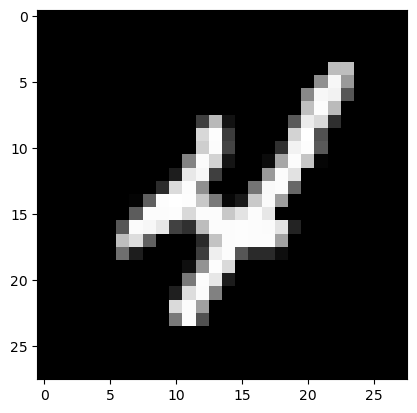

4


In [13]:
sample = torch.tensor(train_dataset[9][0])
print(sample.shape)
# print(sample)
sample = sample.reshape(28, 28)

plt.imshow(sample, cmap='gray')
plt.show()

print(train_dataset[9][1])

In [15]:
num_epochs = 5
input_size = 28 * 28
hidden_size = 100
output_size = 10
learning_rate = 0.001


In [17]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        prediction = model(data.reshape(-1, input_size))
        loss = criterion(prediction, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            print(loss.item())

2.335869550704956
1.8724397420883179
1.4575999975204468
1.0921705961227417
0.8372946381568909
0.6830191016197205
0.6817435622215271
0.5634371638298035
0.5034437775611877
0.5332486629486084
0.3132927417755127
0.37810227274894714
0.454701691865921
0.48448285460472107
0.2941451072692871
0.3272777497768402
0.3441784977912903
0.3081963360309601
0.34001341462135315
0.2200188785791397
0.2156597077846527
0.31471148133277893
0.4666546583175659
0.3436966836452484
0.2131311595439911
0.35172221064567566
0.24285125732421875
0.21363262832164764
0.17642740905284882
0.4202725291252136
0.30613261461257935
0.2672903537750244
0.2976623773574829
0.24451658129692078
0.2614377737045288
0.3343851864337921
0.4217677712440491
0.33684447407722473
0.20707179605960846
0.39677688479423523
0.12521480023860931
0.23894767463207245
0.25305819511413574
0.21804796159267426
0.21238096058368683
0.34831371903419495
0.2375422865152359
0.23795227706432343
0.4425119161605835
0.24569761753082275
0.23461784422397614
0.193515017

In [19]:
all = 0
correct = 0
for i, (inputs, labels) in enumerate(test_loader):
    prediction = model(inputs.reshape(-1, input_size))
    all += labels.size(0)
    for j, label in enumerate(labels):
        if label.item() == prediction[j].argmax().item():
            correct += 1

print(f'Accuracy: {correct / all}')

Accuracy: 0.9721


Real: 3 Predicted: 3


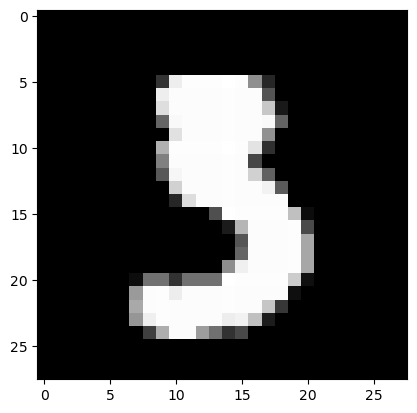

Real: 1 Predicted: 1


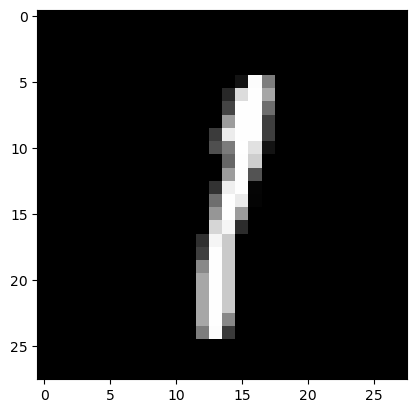

Real: 9 Predicted: 9


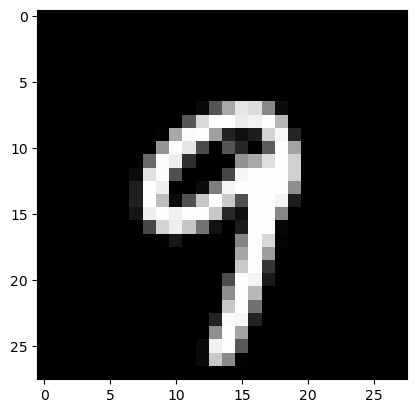

Real: 5 Predicted: 5


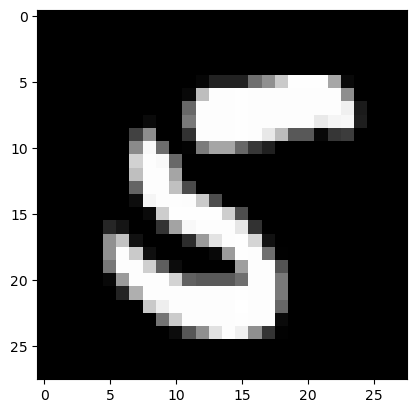

Real: 1 Predicted: 1


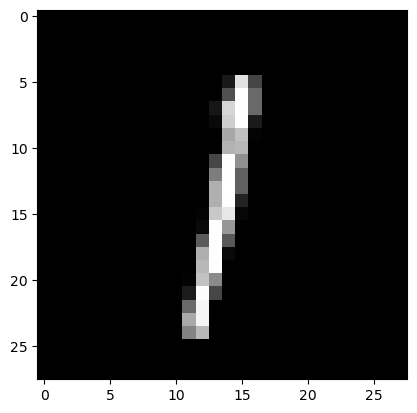

Real: 1 Predicted: 1


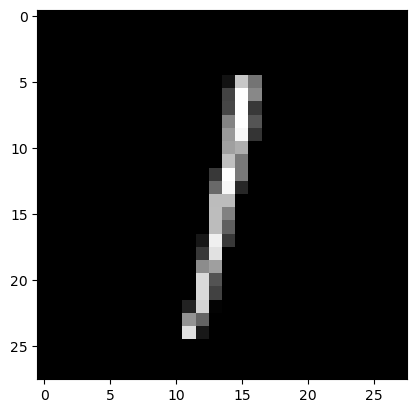

Real: 5 Predicted: 5


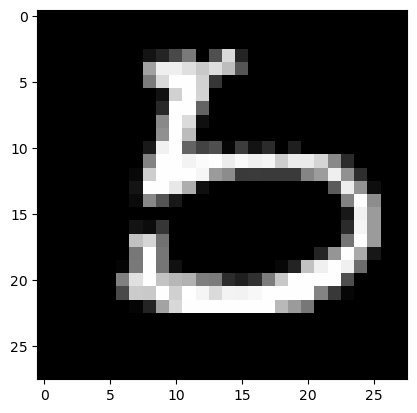

Real: 5 Predicted: 5


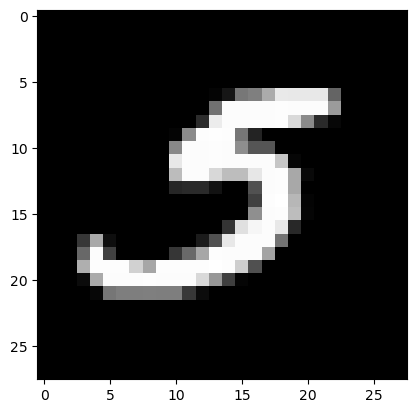

Real: 7 Predicted: 7


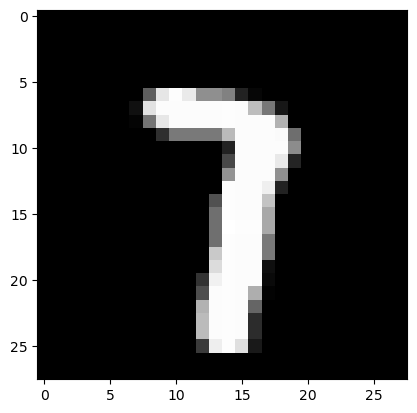

Real: 5 Predicted: 5


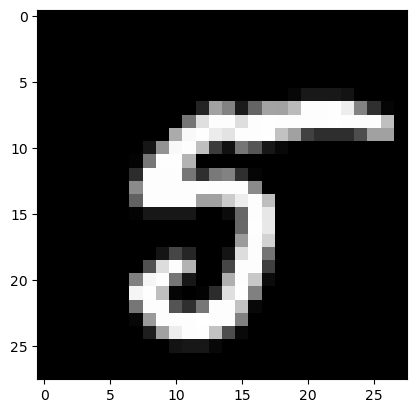

Real: 9 Predicted: 3


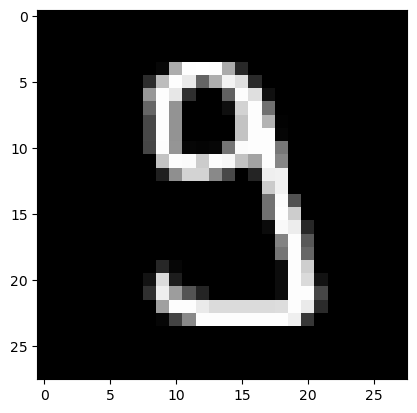

Real: 4 Predicted: 4


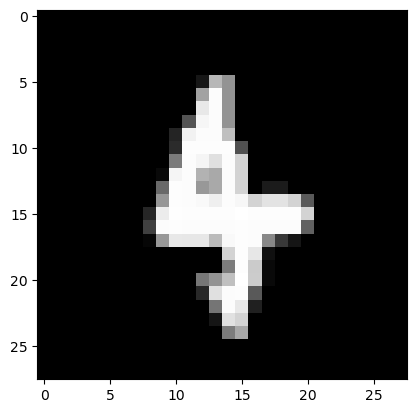

Real: 2 Predicted: 7


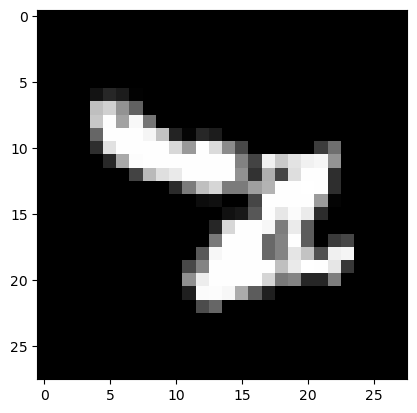

Real: 3 Predicted: 3


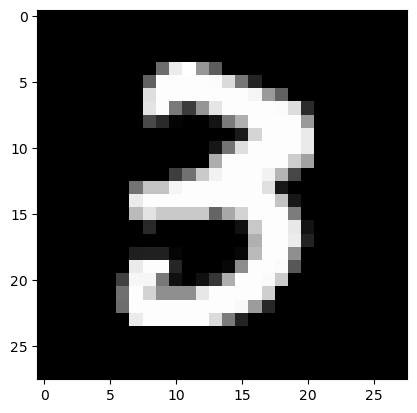

Real: 2 Predicted: 2


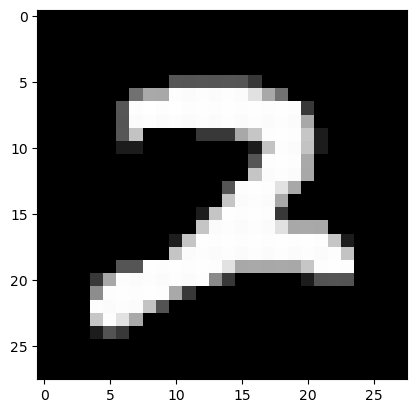

Real: 1 Predicted: 1


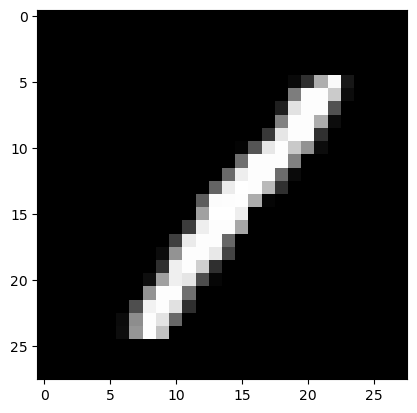

Real: 1 Predicted: 1


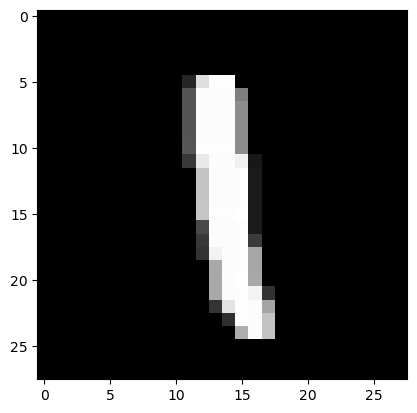

Real: 2 Predicted: 2


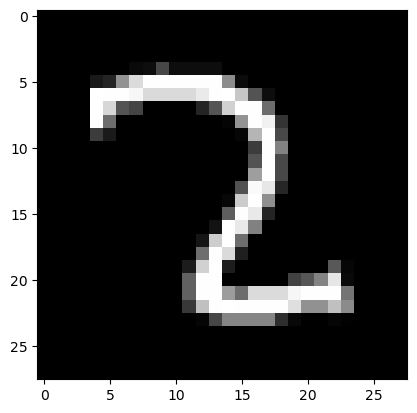

Real: 2 Predicted: 2


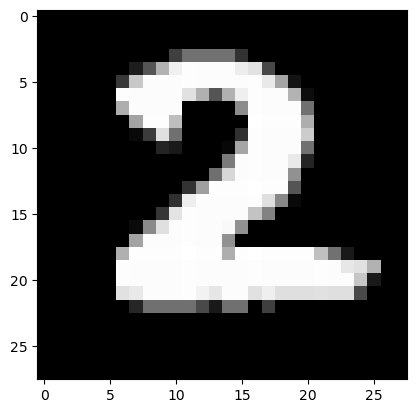

Real: 4 Predicted: 4


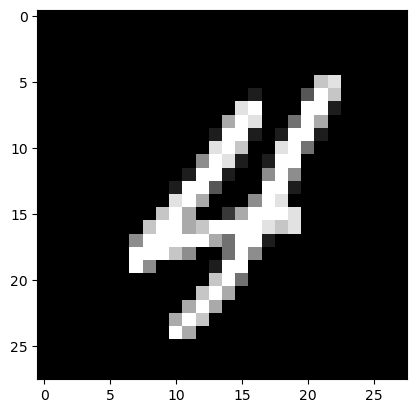

Real: 8 Predicted: 8


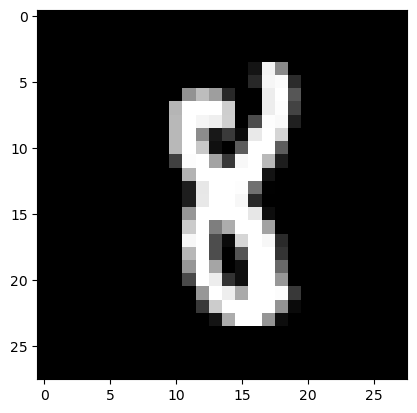

Real: 1 Predicted: 1


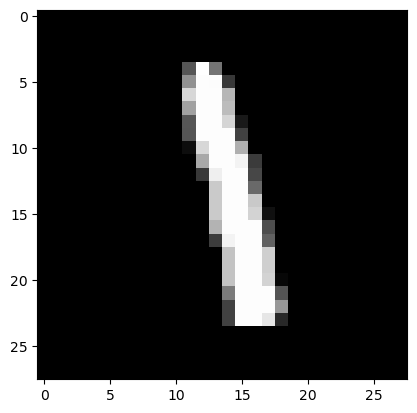

Real: 2 Predicted: 2


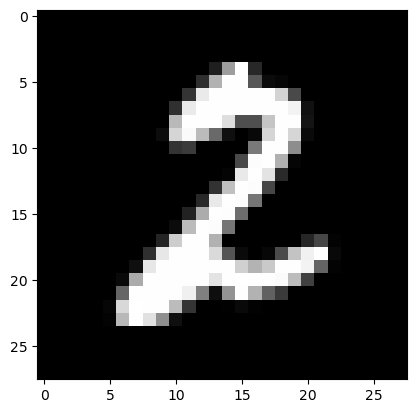

Real: 8 Predicted: 8


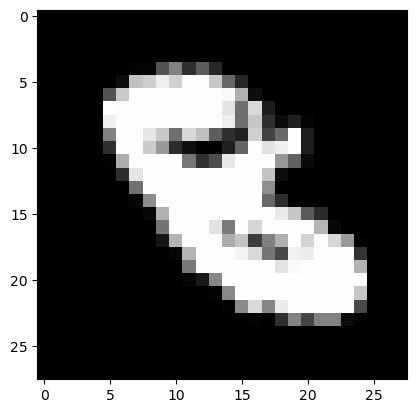

Real: 7 Predicted: 7


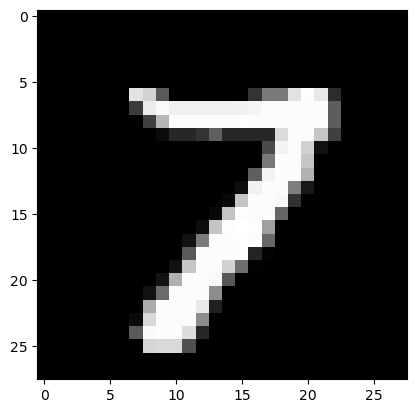

Real: 3 Predicted: 3


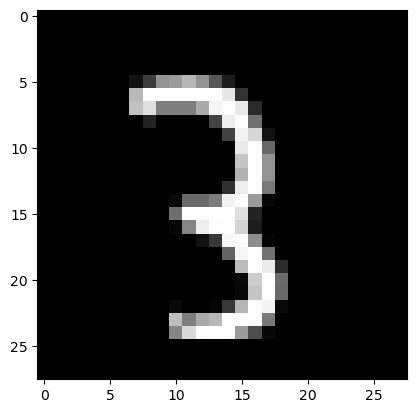

Real: 9 Predicted: 9


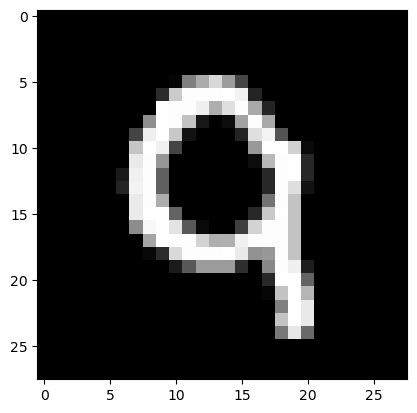

Real: 1 Predicted: 1


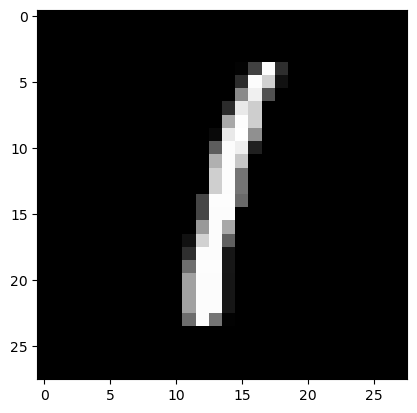

Real: 4 Predicted: 4


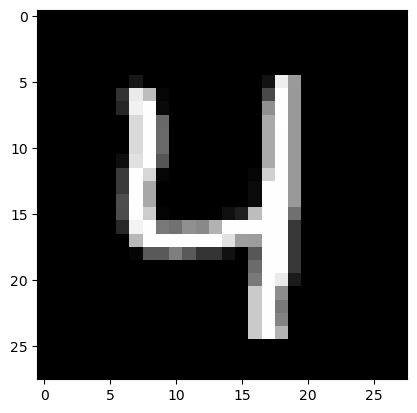

Real: 1 Predicted: 1


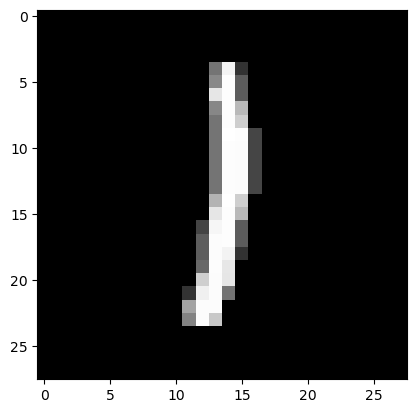

Real: 2 Predicted: 2


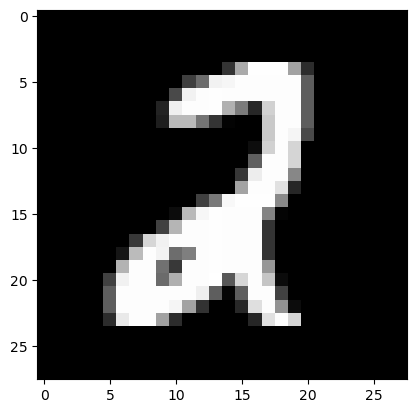

Real: 0 Predicted: 0


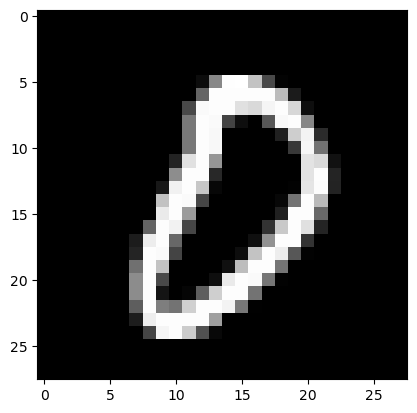

Real: 9 Predicted: 9


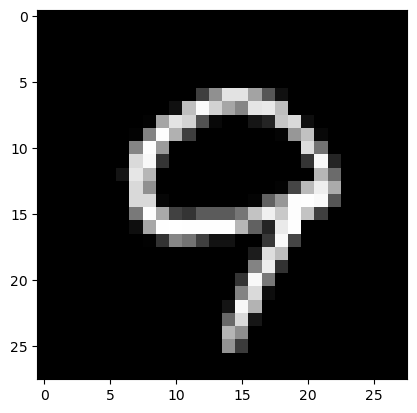

In [20]:
for i, (inputs, labels) in enumerate(test_loader):
    prediction = model(inputs.reshape(-1, input_size))
    all += labels.size(0)
    for j, label in enumerate(labels):
        print(f'Real: {label.item()}', f'Predicted: {prediction[j].argmax().item()}')
        plt.imshow(inputs[j][0], cmap='gray')
        plt.show()
        if j == 10:
            break
    if i == 2:
        break